![head.png](https://github.com/iwh-halle/FinancialDataAnalytics/blob/master/figures/head.jpg?raw=1)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de

# Homework: Natural Language Processing (NLP)

You will need a Git/GitHub repository to submit your course deliverables. Consult [**slides.ipynb**](https://github.com/iwh-halle/FinancialDataAnalytics) for help with the tasks below! If you need further assistance, do not hesitate to open a Q&A at https://github.com/iwh-halle/FinancialDataAnalytics/discussions

### Task: Sourcing

The first stage involves sourcing and reading the textual content of scientific papers. You find an example pdf file in ``../lit/nonanswers.pdf``. Please [download](https://scholar.google.de/) and analyze at least one additional paper of your choice (make sure to commit the paper to your repository).

Use an appropriate PDF reading library or tool to programmatically extract the text. You can find an example below, however, you are free to use any Python library you like.

In [36]:
# Step 1: Install pdfminer.six if you haven't already
# You can install it using conda or pip, see 
  # https://anaconda.org/conda-forge/pdfminer.six
  # https://pypi.org/project/pdfminer.six/

# Step 2: Import the required module
from pdfminer.high_level import extract_text

# Step 3: Extract text from PDF file
nonanswers = extract_text('../lit/nonanswers.pdf')
print(nonanswers[0:80])

“Let me get back to you” –
A machine learning approach to measuring
non-answers



In [37]:
from pdfminer.high_level import extract_text

# Step 3: Extract text from PDF file
extracted_text = extract_text('..\lit\Fundamental Determinants of Real Estate Prices A Panel Study of German Regions.pdf')
print(extracted_text[:])

Int Adv Econ Res (2018) 24:25–45
https://doi.org/10.1007/s11294-018-9671-2

Fundamental Determinants of Real Estate Prices:
A Panel Study of German Regions

Ansgar Belke 1,2,3

& Jonas Keil 4

Published online: 13 February 2018
# International Atlantic Economic Society 2018

Abstract This paper aims at establishing empirical facts on the fundamental determinants
of real estate prices. It contributes to the literature by analysing a unique panel dataset
covering a wide range of real estate market data and other economic variables for nearly
100 German cities. Several robust fundamental determinants are identified, among them
the supply-side factors of construction activity and housing stock as well as the demand-
side factors of apartment rents, market size, age structure, local infrastructure and rental
prices. Results suggest that these factors are robustly linked to fundamental real estate
prices and thus can be used to detect misalignments of market prices.

Keywords Real estate mar

In [38]:
# Removing first lines, Acknowledgements and References
start_word = "Abstract"
end_word = "Acknowledgements"

# Positionen finden
start_position = extracted_text.find(start_word)
end_position = extracted_text.find(end_word)

# Prüfe, ob das Wort gefunden wurde
if start_position != -1 and end_position != -1:
    new_text = extracted_text[start_position:end_position]
    print("Text wurde gekürzt. Und beginnt mit: ")
    print(new_text[:100])
    print("...")
    print("Der Text endet mit: ")
    print(new_text[-100:])
else:
    print("Mindestens ein Wort wurde nicht gefunden.")





Text wurde gekürzt. Und beginnt mit: 
Abstract This paper aims at establishing empirical facts on the fundamental determinants
of real est
...
Der Text endet mit: 
er to come up with an overall indicator could
be used for guiding and evaluating policy decisions.




### Task: Pre-processing

Pre-processing is a critical step aimed at cleaning and preparing the text data for analysis. Steps that you should consider:

* Removing punctuation, numbers and special characters using regular expressions.
* Converting all the text to a uniform case (usually lower case) to ensure that the analysis is not case-sensitive.
* Stop word removal, i.e. eliminating commonly used words (e.g., 'and', 'the', 'is') that do not contribute significantly to the overall meaning and can skew the analysis.
* Other potential pre-processing steps might include stemming and lemmatization, depending on the specific requirements and goals of the analysis. (optional)

In [39]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



# 1. Remove punctuation, numbers, and special characters
cleaned_text = re.sub(r'[^a-zA-Z\s]', '', new_text)

# 2. Convert to lowercase
cleaned_text = cleaned_text.lower()

# 3. Remove stop words
stop_words = set(stopwords.words('english'))
stop_words = stop_words.union(set(['et', 'al'])) # Add 'et al' to the list of stop words
word_tokens = word_tokenize(cleaned_text)
filtered_text = [word for word in word_tokens if word not in stop_words]

# Join the words back into a single string
processed_text = ' '.join(filtered_text)

# Display the first 2000 characters of the processed text
print(processed_text[:])

abstract paper aims establishing empirical facts fundamental determinants real estate prices contributes literature analysing unique panel dataset covering wide range real estate market data economic variables nearly german cities several robust fundamental determinants identified among supplyside factors construction activity housing stock well demand side factors apartment rents market size age structure local infrastructure rental prices results suggest factors robustly linked fundamental real estate prices thus used detect misalignments market prices keywords real estate market fundamental prices regional data panel study jel r r introduction recent times much discussion economic research economic policy revolved around question role asset prices macroeconomic policy particular asset class received lot attention real estate market real estate widely regarded important market real estate price electronic supplementary material online version article httpsdoiorgs contains supplementa

### Task: Analysis

The final stage is the analysis of the pre-processed text, in order to extract meaningful context. This may involve:

* Frequency Analysis: Determining the most commonly occurring words or phrases, which can provide initial insights into the primary focus areas of the papers. Consider, e.g. a word cloud as a visualization.
* Contextual Analysis: Using more advanced NLP techniques such as Word Embedding or Topic Modeling to understand the context of the papers.
* Sentiment analysis: We would expect that scientific papers are written in a neutral tone, can you confirm this?
* Summarization: Employing algorithms to generate concise summaries of the papers, capturing the key points and findings.

Pick any method that you like (you are allowed to use ChatGPT's API as well).

Frequency Analysis

Counter({'real': 162, 'prices': 153, 'estate': 146, 'housing': 94, 'price': 85, 'determinants': 50, 'data': 46, 'demand': 45, 'panel': 44, 'results': 42, 'effects': 37, 'income': 36, 'number': 35, 'market': 34, 'factors': 33, 'fundamental': 32, 'variables': 32, 'apartment': 32, 'interest': 32, 'model': 31, 'german': 28, 'regions': 28, 'variable': 28, 'analysis': 27, 'higher': 26, 'rates': 26, 'fixed': 26, 'cities': 25, 'economic': 24, 'rents': 24, 'across': 24, 'log': 24, 'construction': 23, 'estimations': 22, 'regional': 21, 'positive': 21, 'structure': 20, 'households': 20, 'study': 19, 'since': 19, 'stock': 18, 'used': 18, 'germany': 18, 'unemployment': 18, 'empirical': 17, 'developments': 17, 'using': 17, 'rate': 17, 'markets': 16, 'due': 16, 'sign': 16, 'size': 15, 'policy': 15, 'belke': 15, 'supply': 15, 'different': 15, 'characteristics': 15, 'use': 15, 'age': 14, 'recent': 14, 'important': 14, 'increases': 14, 'large': 14, 'differences': 14, 'transactions': 14, 'regressions': 1

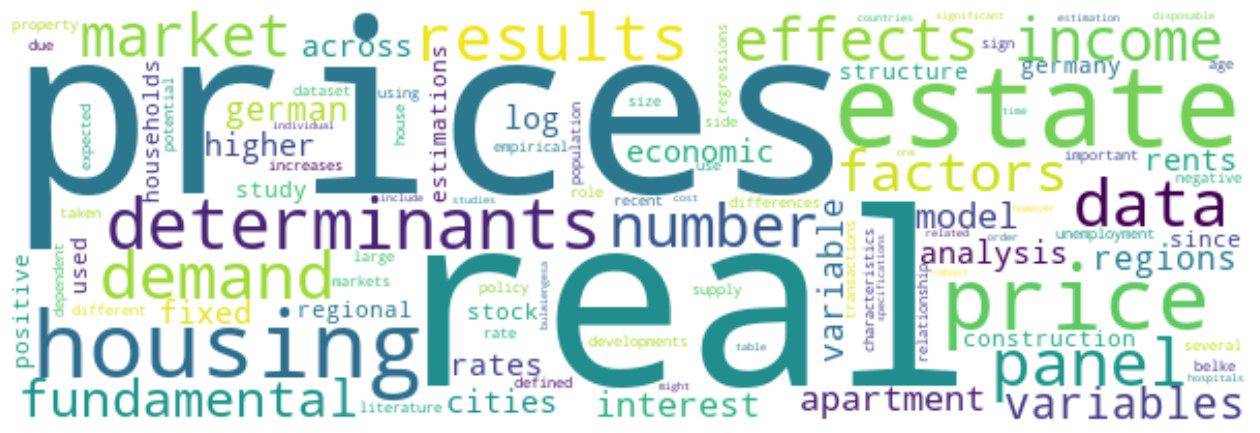

In [40]:
import collections
from matplotlib import pyplot as plt
from wordcloud import WordCloud

raw_word_frequency = collections.Counter(processed_text.split())
print(raw_word_frequency)


# Wordcloud
wc = WordCloud(width=600, height=200, max_words=100, background_color='white').generate_from_frequencies(raw_word_frequency)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Sentiment Analysis

In [41]:
# Importing necessary libraries
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

def analyze_sentiment(article_text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(article_text)
    return sentiment


print(f"Paper sentiment: {analyze_sentiment(processed_text)}")

Paper sentiment: {'neg': 0.062, 'neu': 0.824, 'pos': 0.114, 'compound': 0.9998}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Context Analysis

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert the pre-processed text into a document-term matrix
vectorizer = CountVectorizer(max_df=1, min_df=1, stop_words='english')

# Create a list containing both loaded documents
documents = [processed_text, nonanswers]
dtm = vectorizer.fit_transform(documents)

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=2, random_state=0)
lda.fit(dtm)

# Display the top words in each topic
n_top_words = 15
feature_names = vectorizer.get_feature_names_out()

# Print the most important words for each topic
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx+1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()



Topic #1:
non answer glossary answers relevance journal text calls analysts taddy conference training accounting 2021 cid

Topic #2:
real estate housing determinants demand panel income factors variables apartment fundamental regions german rates cities

